In [1]:
import pandas as pd
import string as str
import seaborn as sns
import matplotlib.pylab as plt

housing = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

In [2]:
housing.zipcode.value_counts() #70 zip codes

98103    563
98038    550
98052    536
98115    530
98117    521
        ... 
98109     99
98010     90
98024     78
98148     49
98039     46
Name: zipcode, Length: 70, dtype: int64

In [3]:
def fix_data(housing):
  housing['date'] = housing.date.str.extract(r"(\d{8})").astype(int)
  #housing['zipcode'] = housing.zipcode.astype(str) get_dummies instead
  return housing

housing = fix_data(housing)

In [4]:

Y = housing.price
X = housing.drop(['price'],axis=1)
X_train1, X_test1, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train = X_train1.drop('zipcode',axis=1)
X_test = X_test1.drop('zipcode',axis=1)

#Fix date

model = XGBRegressor()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
scoring = Y_test - predictions

In [5]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Y_test, predictions, squared=False)


138227.35418601218

In [6]:
from sklearn.metrics import r2_score
r2_score(Y_test,predictions)

0.8733125015903777

In [16]:
(abs(Y_test-predictions)/Y_test).quantile(.95) #Average % distance from true
abs(Y_test-predictions).quantile(.95)

231770.31249999997

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '98004'),
  Text(1, 0, '98039'),
  Text(2, 0, '98040'),
  Text(3, 0, '98109'),
  Text(4, 0, '98166')])

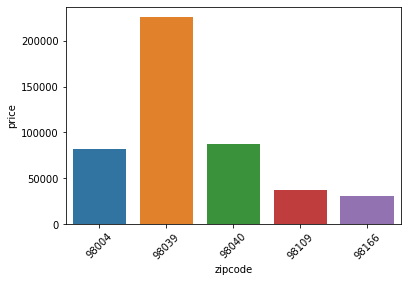

In [62]:

equality = pd.concat([Y_test-predictions,X_test1.zipcode],axis=1).groupby('zipcode').median().reset_index().sort_values('price',ascending=False)
# The 5 zip codes where our model most consistently underestimates 
sns.barplot(data=equality.head(),x='zipcode',y='price')
plt.xticks(rotation=45)


In [63]:
X_test1.query('zipcode == 98039')

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10462,5427100150,20140626,4,2.25,3250,16684,2.0,0,0,3,9,3250,0,1979,0,98039,47.6334,-122.229,2890,16927
5814,3625049079,20140801,3,2.00,2070,9600,1.0,0,1,3,7,1590,480,1946,0,98039,47.6160,-122.239,3000,16215
4546,3262300485,20150421,5,5.25,3410,8118,2.0,0,0,3,11,3410,0,2006,0,98039,47.6295,-122.236,3410,16236
4043,2525049259,20140812,4,4.50,4240,13162,2.0,0,0,3,10,4240,0,2004,0,98039,47.6193,-122.229,3010,12163
8822,2525049263,20140709,5,3.00,4290,20445,2.0,0,0,4,11,4290,0,1985,0,98039,47.6217,-122.239,3620,22325
8374,2210500019,20150324,3,1.00,1320,8500,1.0,0,0,4,7,1320,0,1954,0,98039,47.6187,-122.226,2790,10800
